# Lab 1: Computing Setup

ENGS 199.20  
2025-07-16

## Overview

Today we’re going to install (or double check installations for) the
computing tools we will use in this course and practice the lab report
submission workflow. If you are an experienced programmer, you are free
to follow your own workflow and/or use your own toolkit for implementing
labs - but there is a lower probability that I can help you troubleshoot
any issues you run into. Today’s lab is not graded.

Today we will:

1.  Install [VS Code](https://code.visualstudio.com/),
    [Mamba](https://mamba.readthedocs.io/en/latest/index.html),
    [Python](https://www.python.org/), and [git](https://git-scm.com/).
2.  Setup our [GitHub](https://github.com/) account and create a
    repository for today’s lab.
3.  Run through the setup steps typical of future labs, run some code,
    export our notebook, and submit a pdf on Canvas.

## Lab Workflow

### Installation and Setup

1.  Download [VS Code](https://code.visualstudio.com/) for your machine
    if you don’t already have it.
2.  Install
    [Mamba](https://github.com/conda-forge/miniforge?tab=readme-ov-file#install)
    for your system if you don’t already have it. We will use Python in
    individual `Mamba` environments as opposed to a system-wide
    distribution.
    -   Please review [key
        concepts](https://mamba.readthedocs.io/en/latest/user_guide/concepts.html#concepts)
        for environment management with `Mamba`.
3.  Install the Jupyter & Python VS Code extensions, along with their
    extension packs.
4.  Download [git](https://git-scm.com/downloads) for your machine if
    you don’t already have it.
5.  Setup a
    [GitHub](https://docs.github.com/en/get-started/onboarding/getting-started-with-your-github-account)
    account if you don’t already have one. I *highly* recommend
    following the instructions for [Connecting to GitHub with
    SSH](https://docs.github.com/en/authentication/connecting-to-github-with-ssh).
6.  [Create a new Public
    repository](https://docs.github.com/en/repositories/creating-and-managing-repositories/creating-a-new-repository)
    called ‘ENGS 199.20 Lab 1’. Add a `README`, `.gitignore`, and
    License. Learn about these files if you are unfamiliar with them.
7.  [Clone your
    repository](https://docs.github.com/en/repositories/creating-and-managing-repositories/cloning-a-repository)
    to your local machine. I recommend having a directory for this class
    and to clone the repository inside that directory.
8.  Download this file as a Jupyter notebook (see the upper righthand
    corner of the page) and add it to your project directory. You can
    use whatever git workflow you’d like to do version control, but I
    will provide instructions for using the command line.
    -   Run `git remote -v` to check that your local repository is
        tracking the repository on GitHub.
    -   Run `git status` from this lab directory’s root to see that the
        notebook is untracked.
    -   Run `git add .` to track the notebook.
    -   Run `git commit -m [message]` with your own helpful message.
    -   Use this simple workflow when you make changes to files. If you
        don’t want to track a file, you can add the specific file’s
        location (or use wildcards and file prefixes or suffixes) to
        avoid tracking.
9.  For this lab, we are going to create a small environment that allows
    us to plot using the `seaborn` package. `conda-lock` allows us to
    create multi-platform instances of the exact package versions others
    need to reproduce our computational environment. After following
    these next instructions, we will be ready to run our notebook.

Create a file called `env-lock.yml` in your lab1 directory. Add the
following contents and save:

``` yaml
name: lab1
channels:
  - conda-forge
dependencies:
  - python
  - nbconvert
  - ipykernel
  - seaborn
  - jupyter
  - conda-lock
```

Run `mamba create -f env-lock.yml`. Run `mamba activate lab1`. Set up
the kernel for the environment with
`python -m ipykernel install --user --name lab1 --display-name lab1`.

### Run Code

Below, I reproduce a plot from the [seaborn
Gallery](seaborn.pydata.org/examples/grouped_boxplot.html). Make sure
the `lab1` kernel is set up in the notebook and then run the code block.

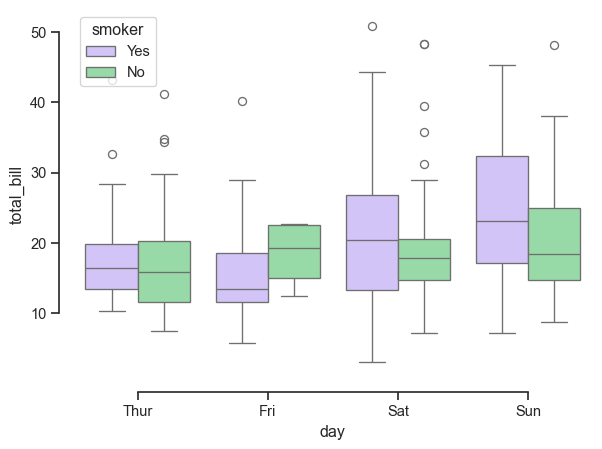

In [1]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="day", y="total_bill",
            hue="smoker", palette=["m", "g"],
            data=tips)
sns.despine(offset=10, trim=True)

Attractive and clear figures are very important in decision analysis.
Run the cell below, which makes the figure higher resolution and makes
the font more legible. Some changes reflect my personal style
preferences.

In [2]:
import matplotlib.pyplot as plt

# Set up a figure with higher resolution
fig, ax = plt.subplots(dpi=300)

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="day",
            y="total_bill",
            hue="smoker",
            showfliers=False,
            palette=["m", "g"],
            showmeans=True,
            meanprops={'marker': 'D',
                       'markerfacecolor': 'firebrick',
                       'markeredgecolor': 'firebrick'},
            data=tips,
            ax=ax)

# Rename legend title and increase font size
sns.move_legend(ax,
                loc='best',
                title='Smoker at Table?',
                alignment='left',
                fontsize=12,
                title_fontsize=14)

# Make tick labels more legible
ax.tick_params(labelsize=12)

# Rename axis labels
ax.set_ylabel("Total Bill ($)", size=14)
ax.set_xlabel("Day", size=14)
plt.show()

Following the link in the seaborn example, we can learn more about the
tips data [here](https://rdrr.io/cran/reshape2/man/tips.html).

To complete this lab report, add a code cell where you create a new
figure that explores the relationship between variables in this dataset.
It does not have to use the variables we used so far, nor do you have to
use a boxplot. Make sure your tick and axis labels are at least size 12
and that the figure resolution is at least 300 dots per inch. Make sure
your figure includes a caption, which must state the association
considered in the exploratory visualization. In the cell after your
plot, add a markdown cell where you:

1.  Write out a caption;
2.  Describe the plotted result;
3.  Suggest further analysis that could help uncover the relationship
    between these and/or other variables.

See a text example below for the revised figure from the seaborn example
(note the caption underneath the revised figure on the website).

Analysis: On average, the waiter’s bills were similar regardless of day
of the week or whether a smoker was present in the party. On Saturdays
and Sundays, bills tended to be larger and more variable when smokers
are in a party.

Future work: Lacking information on the relative frequency of bills
across days of the week and smokers present in a party, it is difficult
to draw strong conclusions about the associations of bill size and the
considered variables. To better understand these associations, it would
be helpful to show histograms in a second panel under the present plot.
In addition, it’s not clear why presence of smokers in a dining party
would have any association with the bill size. Other variables in the
dataset, such as time of day and size of the party are likely more
relevant to consider.

**Note**: If you do not have experience with Python, I recommend trying
to generate a new plot – the `seaborn` package does not really require
Python knowledge to generate a new plot. However, today’s lab is not
graded so you don’t *have* to generate a new plot, write a caption,
etc., I think it’s a good opportunity to practice the lab submission
workflow and ask questions now before I start grading labs.

### Submit Code and Report

Make sure your GitHub repository is up to date.

Export your .ipynb as a .pdf and submit on Canvas. In your submission,
share a link to your repository. Please replace “ENGS 199.20” in the top
cell with your name and change the filename to include your name.

> **Printing Code to PDF**
>
> Because we included `nbconvert` in our computational environment, we
> should be able to export the .ipynb to .pdf using VS Code and get a
> nicely formatted file.